# KNN using Hyperparameter tuning

In [92]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
from sklearn.model_selection import GridSearchCV,KFold

In [93]:
df=pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [95]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [96]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [97]:
df.duplicated().sum()

0

In [98]:
df=df.drop(['Age'],axis=1)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome
0,6,148,72,35,0,33.6,0.627,1
1,1,85,66,29,0,26.6,0.351,0
2,8,183,64,0,0,23.3,0.672,1
3,1,89,66,23,94,28.1,0.167,0
4,0,137,40,35,168,43.1,2.288,1
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,0
764,2,122,70,27,0,36.8,0.340,0
765,5,121,72,23,112,26.2,0.245,0
766,1,126,60,0,0,30.1,0.349,1


In [99]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [100]:
X=df.drop(['Outcome'],axis=1)
y=df['Outcome']

In [101]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [102]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction
418,1,83,68,0,0,18.2,0.624
526,1,97,64,19,82,18.2,0.299
759,6,190,92,0,0,35.5,0.278
512,9,91,68,0,0,24.2,0.200
105,1,126,56,29,152,28.7,0.801
...,...,...,...,...,...,...,...
139,5,105,72,29,325,36.9,0.159
701,6,125,78,31,0,27.6,0.565
545,8,186,90,35,225,34.5,0.423
229,0,117,80,31,53,45.2,0.089


In [103]:
y_train

585    0
164    1
535    1
224    0
126    0
      ..
434    0
203    0
563    0
427    1
649    0
Name: Outcome, Length: 537, dtype: int64

In [104]:
y_test

418    0
526    0
759    1
512    0
105    0
      ..
139    0
701    1
545    1
229    0
367    0
Name: Outcome, Length: 231, dtype: int64

# Model Building

In [115]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(knn.score(X_test,y_test))

              precision    recall  f1-score   support

           0       0.74      0.84      0.79       150
           1       0.61      0.46      0.52        81

    accuracy                           0.71       231
   macro avg       0.67      0.65      0.65       231
weighted avg       0.69      0.71      0.69       231

[[126  24]
 [ 44  37]]
0.7056277056277056


# Model Complexity

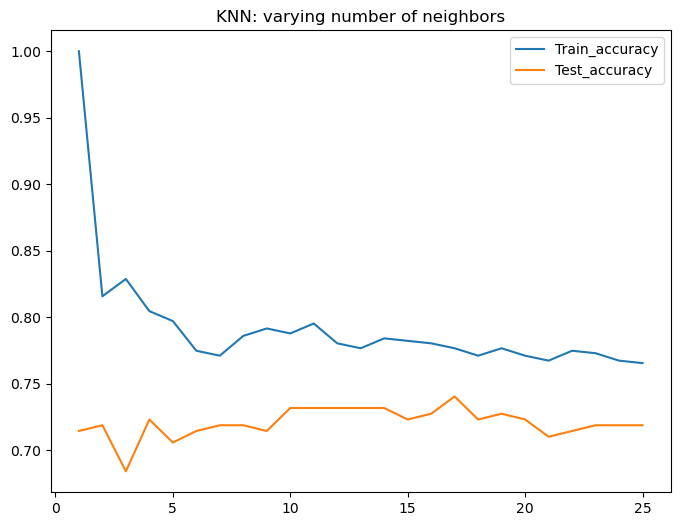

In [106]:
training_accuracies={}
testing_accuracies={}
neighbors=np.arange(1,26)
for neighbor in neighbors:
    knn=KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train,y_train)
    training_accuracies[neighbor]=knn.score(X_train,y_train)
    testing_accuracies[neighbor]=knn.score(X_test,y_test)

plt.figure(figsize=(8,6))
plt.title('KNN: varying number of neighbors')
plt.plot(neighbors,training_accuracies.values(),label='Train_accuracy')
plt.plot(neighbors,testing_accuracies.values(),label='Test_accuracy')
plt.legend()
plt.show()

# Hyperparameter tuning

In [113]:
param_grid = {'n_neighbors': [3, 5, 7]}
knn = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [3, 5, 7],           
    'weights': ['uniform', 'distance'],  
    'metric': ['euclidean', 'manhattan'] 
}
kf = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=kf)
grid_search.fit(X, y)
best_params = grid_search.best_params_
best_knn = grid_search.best_estimator_
print(grid_search.best_params_, grid_search.best_score_)

{'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'} 0.7213564213564214
